In [1]:
#check_results.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#evolve a handful of unperturbed particles having 1e-6 < e < 1e-2 particles for 2e4 orbits
#and show that the fractional variations in a and e are tiny

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)

helper_fns.py:29: RuntimeWarning: invalid value encountered in greater
  idx = angle > np.pi
helper_fns.py:31: RuntimeWarning: invalid value encountered in less
  idx = angle < -np.pi


ValueError: zero-size array to reduction operation minimum which has no identity

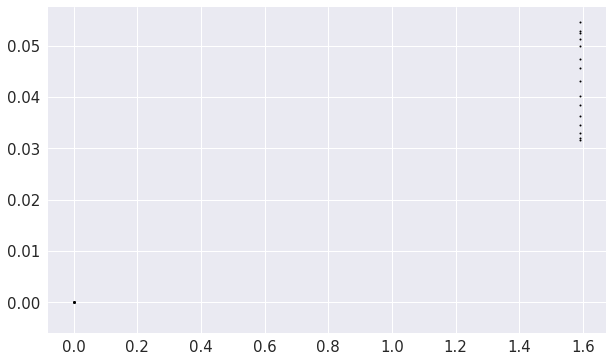

In [4]:
#plot de vs time
f, ax = plt.subplots(figsize=(10, 6))
for tm in range(len(times)):
    de = np.abs(e[tm] - e[0])
    time = np.zeros_like(de) + times[tm]/(2.0*np.pi)
    p = sns.regplot(time, de, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's':4}, marker='o', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10, 2.0e4)
ax.set_ylim(2.0e-17, 2.0e-11)
ax.set_title('e variations vs time')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$|\Delta e|$')

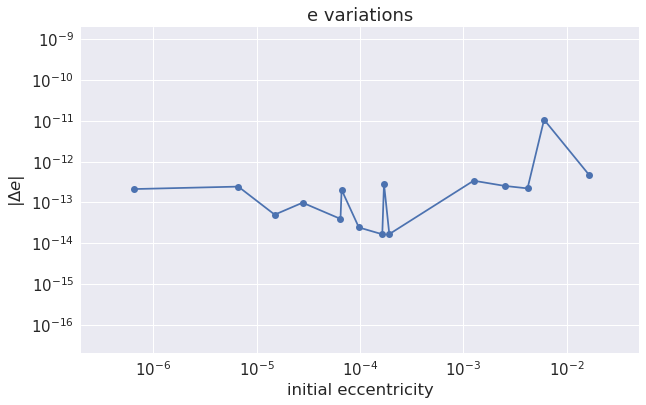

In [32]:
#plot final |de| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
delta = np.abs(e[-1] - e[0]).flatten()
e0 = e[0].flatten()
idx = e0.argsort()
e0 = e0[idx]
delta = delta[idx]
p = ax.plot(e0, delta, marker='o', linestyle='-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2.0e-7, 5.0e-2)
ax.set_ylim(2.0e-17, 2.0e-9)
ax.set_title('e variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('$|\Delta e|$')

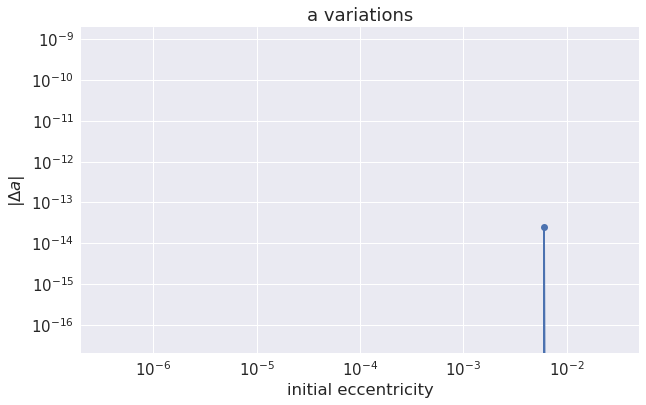

In [33]:
#plot final |da| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
delta = np.abs(a[-1] - a[0]).flatten()
e0 = e[0].flatten()
idx = e0.argsort()
e0 = e0[idx]
delta = delta[idx]
p = ax.plot(e0, delta, marker='o', linestyle='-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2.0e-7, 5.0e-2)
ax.set_ylim(2.0e-17, 2.0e-9)
ax.set_title('a variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('$|\Delta a|$')

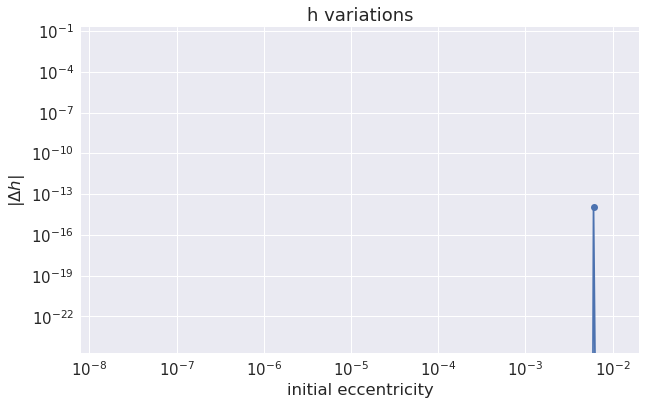

In [34]:
#plot final |dh| versus initial e
h = r*vt
f, ax = plt.subplots(figsize=(10, 6))
delta = np.abs(h[-1] - h[0]).flatten()
e0 = e[0].flatten()
idx = e0.argsort()
e0 = e0[idx]
delta = delta[idx]
p = ax.plot(e0, delta, marker='o', linestyle='-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-9, 2.0e-2)
ax.set_ylim(2.0e-25, 2.0e-1)
ax.set_title('h variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('$|\Delta h|$')

In [35]:
a[-1]-a[0]

array([[ -2.42028619e-14],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00]])

In [9]:
r[0]

array([[ 0.9977878 ],
       [ 1.00726844],
       [ 1.01434717],
       [ 1.02130434],
       [ 1.02857032],
       [ 1.03609642],
       [ 1.04289058],
       [ 1.05037054],
       [ 1.05799109],
       [ 1.0642944 ],
       [ 1.07142855],
       [ 1.07868921],
       [ 1.08574672],
       [ 1.09292371],
       [ 1.09994547]])

In [10]:
a[0]

array([[ 0.99244289],
       [ 0.99964016],
       [ 1.00683664],
       [ 1.01403236],
       [ 1.02122732],
       [ 1.02842156],
       [ 1.03561507],
       [ 1.04280788],
       [ 1.05      ],
       [ 1.05719145],
       [ 1.06438223],
       [ 1.07157237],
       [ 1.07876187],
       [ 1.08595075],
       [ 1.09313902]])

In [11]:
a[1]

array([[ 0.47898998],
       [ 0.4939113 ],
       [ 0.50848339],
       [ 0.52273673],
       [ 0.53669775],
       [ 0.55038956],
       [ 0.56383251],
       [ 0.57704459],
       [ 0.59004186],
       [ 0.60283864],
       [ 0.61544784],
       [ 0.6278811 ],
       [ 0.64014897],
       [ 0.65226103],
       [ 0.66422604]])